In [1]:
!pip install -q kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [5]:
!chmod 600 /content/kaggle.json

In [9]:
! kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
  0% 0.00/14.5M [00:00<?, ?B/s]
100% 14.5M/14.5M [00:00<00:00, 1.36GB/s]


In [11]:
!unzip /content/online-retail-ii-uci.zip

Archive:  /content/online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


# Read data

In [10]:
import pandas as pd

In [29]:
df = pd.read_csv('online_retail_II.csv')

In [30]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [31]:
df.shape

(1067371, 8)

In [32]:
df.dropna(inplace=True)

In [33]:
invalid_codes = [item for item in set(df['StockCode']) if not item[0].isdigit()]
invalid_codes

['PADS',
 'TEST001',
 'ADJUST2',
 'TEST002',
 'CRUK',
 'SP1002',
 'D',
 'ADJUST',
 'C2',
 'M',
 'BANK CHARGES',
 'DOT',
 'POST']

In [34]:
df = df[~df['StockCode'].isin(invalid_codes)]
df.shape

(820626, 8)

In [35]:
france_df = df[df['Country'] == "France"]

In [39]:
transactions = pd.get_dummies(france_df[['Invoice', "StockCode"]], columns=["StockCode"]).groupby("Invoice").any()

In [40]:
transactions

,StockCode_10002,StockCode_10120,StockCode_10123C,StockCode_10123G,StockCode_10125,StockCode_10135,StockCode_11001,StockCode_15036,StockCode_15039,StockCode_15044C,...,StockCode_90184B,StockCode_90184C,StockCode_90201B,StockCode_90201C,StockCode_90208,StockCode_90209A,StockCode_90214C,StockCode_90214E,StockCode_90214L,StockCode_90214S
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
489557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
489883,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
490139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
490152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C579532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C579562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
transactions.sum(axis=0).describe()
# this statistic will use when change parameter on density base clustering

,0
count,2002.000000
mean,6.671329
std,12.156109
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,132.000000


# DB-Scan

In [53]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [44]:
dbscan = DBSCAN(min_samples=3, eps=0.5, metric='cosine')
dbscan.fit(transactions)

DBSCAN(metric='cosine', min_samples=3)

In [49]:
print(dbscan.labels_)
# -1 is noise, otherwise is sample in cluster

[-1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1  1 -1  2 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1  0
 -1 -1  3 -1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  4 18 -1 -1 -1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1  9 -1  2 -1 -1 -1 -1  3 -1 16  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  4 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  5  5 -1  2 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 17 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  6 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1
 12 -1 -1 -1 -1 -1 -1 -1  1  1 12 -1 -1  0 -1 -1 -1

(array([576.,  20.,   9.,   7.,   3.,   4.,   3.,   7.,  12.,   3.,   9.,
          3.,   3.,   3.,   3.,   3.,  22.,   4.,   4.,   3.]),
 array([-1.  , -0.05,  0.9 ,  1.85,  2.8 ,  3.75,  4.7 ,  5.65,  6.6 ,
         7.55,  8.5 ,  9.45, 10.4 , 11.35, 12.3 , 13.25, 14.2 , 15.15,
        16.1 , 17.05, 18.  ]),
 <BarContainer object of 20 artists>)

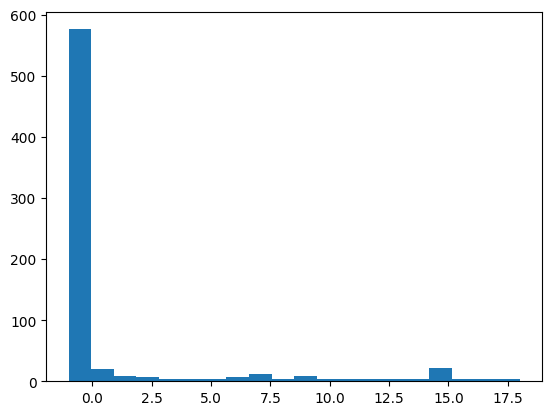

In [52]:
plt.hist(dbscan.labels_, bins=len(set(dbscan.labels_)))

In [55]:
pca = PCA(n_components=2)

In [57]:
transaction_2d = pca.fit_transform(transactions)

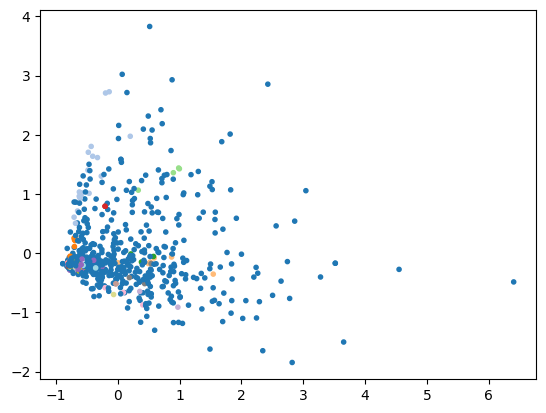

In [59]:
plt.scatter(transaction_2d[:,0], transaction_2d[:,1], marker='.', c=dbscan.labels_, cmap='tab20')

In [58]:
non_noise = transaction_2d[dbscan.labels_ >= 0]
non_noise_labels = dbscan.labels_[dbscan.labels_ >= 0]

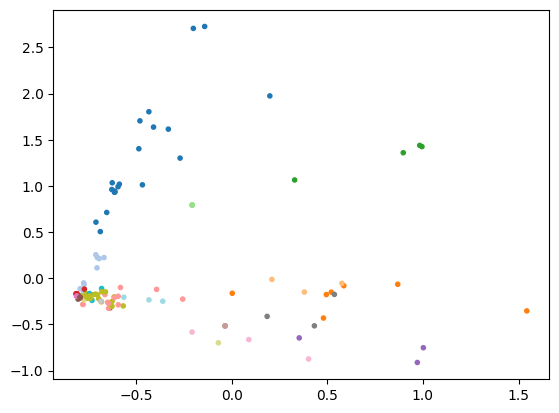

In [60]:
plt.scatter(non_noise[:,0], non_noise[:,1], marker='.', c=non_noise_labels, cmap='tab20')

In [61]:
# Try tsne
from sklearn.manifold import TSNE

In [62]:
tsne = TSNE(n_components=2)

In [63]:
non_noise_tsne = tsne.fit_transform(non_noise)

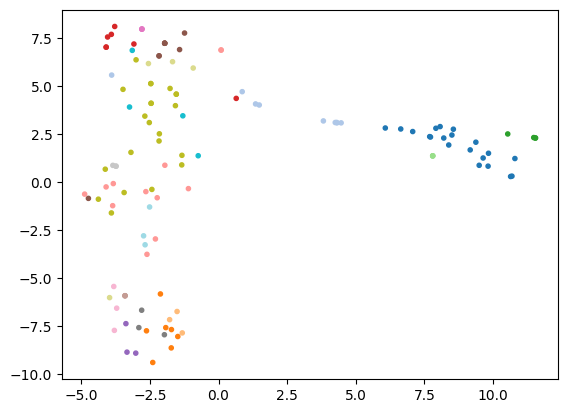

In [64]:
plt.scatter(non_noise_tsne[:,0], non_noise_tsne[:,1], marker='.', c=non_noise_labels, cmap='tab20')

In [65]:
import numpy as np

In [66]:
class_0 = np.where(dbscan.labels_ == 0)
class_0

(array([ 52,  58,  71,  80,  88, 128, 148, 187, 202, 263, 289, 291, 325,
        361, 383, 393, 410, 411, 449, 533]),)

In [68]:
items = transactions.iloc[class_0].index
items

Index(['502636', '504709', '507697', '510651', '511825', '521373', '525249',
       '533548', '534696', '543459', '546765', '547087', '552464', '555941',
       '558334', '559685', '562520', '562894', '566736', '575880'],
      dtype='object', name='Invoice')

In [69]:
transactions.iloc[class_0].sum()
# Stock code was buyed in class 0 group

,0
StockCode_10002,1
StockCode_10120,0
StockCode_10123C,0
StockCode_10123G,0
StockCode_10125,0
...,...
StockCode_90209A,0
StockCode_90214C,0
StockCode_90214E,0
StockCode_90214L,0


In [72]:
selected_codes = transactions.columns[transactions.iloc[class_0].sum() > 0]

In [71]:
selected_codes

Index(['StockCode_10002', 'StockCode_20675', 'StockCode_20676',
       'StockCode_20677', 'StockCode_20750', 'StockCode_20941',
       'StockCode_20975', 'StockCode_20977', 'StockCode_20979',
       'StockCode_20983', 'StockCode_21077', 'StockCode_21080',
       'StockCode_21086', 'StockCode_21094', 'StockCode_21121',
       'StockCode_21122', 'StockCode_21123', 'StockCode_21124',
       'StockCode_21125', 'StockCode_21126', 'StockCode_21153',
       'StockCode_21207', 'StockCode_21212', 'StockCode_21213',
       'StockCode_21219', 'StockCode_21243', 'StockCode_21244',
       'StockCode_21498', 'StockCode_21544', 'StockCode_21679',
       'StockCode_21731', 'StockCode_21746', 'StockCode_21749',
       'StockCode_21791', 'StockCode_21829', 'StockCode_21843',
       'StockCode_21883', 'StockCode_21888', 'StockCode_21912',
       'StockCode_21913', 'StockCode_21987', 'StockCode_21988',
       'StockCode_21989', 'StockCode_22080', 'StockCode_22082',
       'StockCode_22090', 'StockCode_221

In [73]:
df[df['Invoice'].isin(items)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
138453,502636,21544,SKULLS WATER TRANSFER TATTOOS,36,2010-03-25 16:25:00,0.85,12726.0,France
138454,502636,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-03-25 16:25:00,1.25,12726.0,France
138455,502636,21124,SET/10 BLUE SPOTTY PARTY CANDLES,48,2010-03-25 16:25:00,1.25,12726.0,France
138456,502636,21122,SET/10 PINK SPOTTY PARTY CANDLES,48,2010-03-25 16:25:00,1.25,12726.0,France
138457,502636,21121,SET/10 RED SPOTTY PARTY CANDLES,48,2010-03-25 16:25:00,1.25,12726.0,France
...,...,...,...,...,...,...,...,...
985291,575880,22549,PICTURE DOMINOES,12,2011-11-11 13:35:00,1.45,12726.0,France
985292,575880,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-11 13:35:00,1.25,12726.0,France
985293,575880,21888,BINGO SET,4,2011-11-11 13:35:00,3.75,12726.0,France
985294,575880,23229,VINTAGE DONKEY TAIL GAME,6,2011-11-11 13:35:00,3.75,12726.0,France


In [79]:
# Try to see what do they buy
for invoice in items:
  print(f'Invoice: {invoice}')
  print('\n'.join(df[df['Invoice'] == invoice]['Description'].values))
  print()

Invoice: 502636
SKULLS  WATER TRANSFER TATTOOS 
VINTAGE HEADS AND TAILS CARD GAME 
SET/10 BLUE SPOTTY PARTY CANDLES
SET/10 PINK SPOTTY PARTY CANDLES
SET/10 RED SPOTTY PARTY CANDLES
SET/6 RED SPOTTY PAPER CUPS
SET/6 RED SPOTTY PAPER PLATES
SET/20 RED SPOTTY PAPER NAPKINS 
MINI JIGSAW SPACEBOY

Invoice: 504709
SET/6 RED SPOTTY PAPER CUPS
SET/6 RED SPOTTY PAPER PLATES
MINI JIGSAW CIRCUS PARADE 
MINI JIGSAW SPACEBOY
MINI JIGSAW DINOSAUR 

Invoice: 507697
PAPER BUNTING RETRO SPOTS
SET/6 RED SPOTTY PAPER CUPS
SKULL AND CROSSBONES  GARLAND 
PACK OF 6 SKULL PAPER CUPS
PACK OF 20 SKULL PAPER NAPKINS
SET/20 WOODLAND PAPER NAPKINS 
SET/6 RED SPOTTY PAPER PLATES
PACK OF 6 SKULL PAPER PLATES
SET OF 9 BLACK SKULL BALLOONS
SET OF 9 HEART SHAPED BALLOONS
SET/20 RED SPOTTY PAPER NAPKINS 
INFLATABLE POLITICAL GLOBE 
JIGSAW TREE WITH WATERING CAN
PACK OF 72 RETRO SPOT CAKE CASES
PACK OF 72 SKULL CAKE CASES
SET OF 3 HEART COOKIE CUTTERS
SET/10 RED SPOTTY PARTY CANDLES
CHERRY DESIGN PAPERLANTERNS
12 PENCIL

In [80]:
# Class 0 is group for invoice that contain PAPER CUPS and PAPER PLATES